In [3]:
import warnings
warnings.filterwarnings("ignore")

import os
import shutil
import glob

In [4]:
!wget https://www.dropbox.com/s/alw4wehyx8gxb1j/dogs-vs-cats.zip?dl=0
!unzip /content/dogs-vs-cats.zip?dl=0

!unzip /content/train.zip
!unzip /content/test1.zip

Streaming output truncated to the last 5000 lines.
  inflating: test1/5499.jpg          
  inflating: test1/55.jpg            
  inflating: test1/550.jpg           
  inflating: test1/5500.jpg          
  inflating: test1/5501.jpg          
  inflating: test1/5502.jpg          
  inflating: test1/5503.jpg          
  inflating: test1/5504.jpg          
  inflating: test1/5505.jpg          
  inflating: test1/5506.jpg          
  inflating: test1/5507.jpg          
  inflating: test1/5508.jpg          
  inflating: test1/5509.jpg          
  inflating: test1/551.jpg           
  inflating: test1/5510.jpg          
  inflating: test1/5511.jpg          
  inflating: test1/5512.jpg          
  inflating: test1/5513.jpg          
  inflating: test1/5514.jpg          
  inflating: test1/5515.jpg          
  inflating: test1/5516.jpg          
  inflating: test1/5517.jpg          
  inflating: test1/5518.jpg          
  inflating: test1/5519.jpg          
  inflating: test1/552.jpg           

In [1]:
TRAIN_DIR="./DATASET"
ORG_DIR="/content/train"
CLASS=["cat","dog"]

In [6]:
for C in CLASS:
  DEST = os.path.join(TRAIN_DIR, C)
  
  #if directory is not present then create one 
  if not os.path.exists(DEST):
    os.makedirs(DEST)
  for img_path in glob.glob(os.path.join(ORG_DIR, C)+"*" ):
    SRC=img_path
    shutil.copy(SRC, DEST)

In [7]:
os.listdir("/content/train")

['dog.4437.jpg',
 'dog.5054.jpg',
 'cat.6337.jpg',
 'cat.6804.jpg',
 'cat.10667.jpg',
 'dog.775.jpg',
 'dog.2996.jpg',
 'dog.4945.jpg',
 'cat.2328.jpg',
 'dog.1596.jpg',
 'cat.6392.jpg',
 'cat.1264.jpg',
 'dog.8885.jpg',
 'cat.785.jpg',
 'cat.8910.jpg',
 'dog.5202.jpg',
 'cat.753.jpg',
 'cat.9140.jpg',
 'dog.10889.jpg',
 'cat.1771.jpg',
 'cat.1027.jpg',
 'cat.407.jpg',
 'cat.12374.jpg',
 'cat.2554.jpg',
 'cat.5111.jpg',
 'dog.12138.jpg',
 'cat.7467.jpg',
 'dog.5179.jpg',
 'dog.3700.jpg',
 'cat.2579.jpg',
 'dog.9194.jpg',
 'cat.4646.jpg',
 'cat.10254.jpg',
 'cat.5988.jpg',
 'cat.9822.jpg',
 'dog.7342.jpg',
 'dog.4146.jpg',
 'dog.8080.jpg',
 'cat.5126.jpg',
 'cat.9465.jpg',
 'dog.4237.jpg',
 'dog.6180.jpg',
 'dog.7920.jpg',
 'dog.8963.jpg',
 'dog.9784.jpg',
 'dog.3025.jpg',
 'dog.6645.jpg',
 'cat.714.jpg',
 'dog.10456.jpg',
 'dog.8068.jpg',
 'cat.2160.jpg',
 'dog.3440.jpg',
 'cat.4414.jpg',
 'dog.4144.jpg',
 'dog.1837.jpg',
 'dog.291.jpg',
 'cat.8036.jpg',
 'dog.1716.jpg',
 'dog.377.jpg'

Build Model of CNN

In [51]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from keras.layers import Dense,Flatten
from keras.models import Model
from keras.applications.inception_v3 import InceptionV3, preprocess_input
from keras.preprocessing.image import ImageDataGenerator,load_img,img_to_array
import keras

In [12]:
base_model= InceptionV3(input_shape=(256,256,3), include_top= False)

87924736/87910968 [==============================] - 1s 0us/step


In [27]:
for layer in base_model.layers:
  layer.trainable=False

In [28]:
X=Flatten()(base_model.output)
X=Dense(units=2,activation='sigmoid')(X)

#Final Model
model=Model(base_model.input,X)

#compile the model
model.compile(optimizer='adam',loss=keras.losses.binary_crossentropy, metrics=['accuracy'])

#summary
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 256, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 127, 127, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 127, 127, 32  96         ['conv2d[0][0]']                 
 alization)                     )                                                           

Pre-Process Data in Data generator

In [29]:

train_datagen=ImageDataGenerator(featurewise_center=True, 
                                 rotation_range=0.4, 
                                 width_shift_range=0.3, 
                                 horizontal_flip=True,
                                 preprocessing_function= preprocess_input,
                                 zoom_range=0.4,
                                 shear_range=0.4)
train_data=train_datagen.flow_from_directory(directory="/content/DATASET",
                                             target_size=(256,256), 
                                             batch_size=36)

Found 25000 images belonging to 2 classes.


In [30]:
train_data.class_indices

{'cat': 0, 'dog': 1}

Visualizing Data

In [31]:
t_img,label=train_data.next()

In [32]:
t_img

array([[[[-0.06452006, -0.2919711 , -0.41176468],
         [-0.05882353, -0.28058732, -0.38332862],
         [-0.07158267, -0.2656722 , -0.3470307 ],
         ...,
         [-0.19999999, -0.5137255 , -0.60784316],
         [-0.19999999, -0.5137255 , -0.60784316],
         [-0.19999999, -0.5137255 , -0.60784316]],

        [[-0.06458724, -0.2920382 , -0.41176468],
         [-0.05882353, -0.28062087, -0.38349646],
         [-0.07151556, -0.26573932, -0.34716493],
         ...,
         [-0.19999999, -0.5137255 , -0.60784316],
         [-0.19999999, -0.5137255 , -0.60784316],
         [-0.19999999, -0.5137255 , -0.60784316]],

        [[-0.06465435, -0.29210532, -0.41176468],
         [-0.05882353, -0.28065443, -0.38366425],
         [-0.07144845, -0.26580644, -0.34729922],
         ...,
         [-0.19999999, -0.5137255 , -0.60784316],
         [-0.19999999, -0.5137255 , -0.60784316],
         [-0.19999999, -0.5137255 , -0.60784316]],

        ...,

        [[ 0.5302634 ,  0.3281343 ,  0

In [33]:
t_img.shape

(36, 256, 256, 3)

In [34]:
def plotimages(img_arr,label):
  for idx,img in enumerate(img_arr):
    if idx<=10:
      plt.figure(figsize=(5,5))
      plt.imshow(img)
      plt.title(img.shape)
      plt.axis=False
      plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


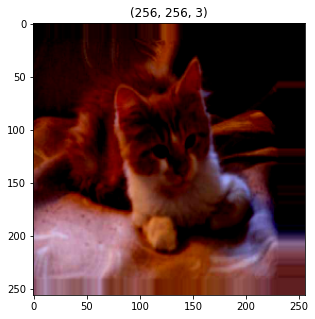

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


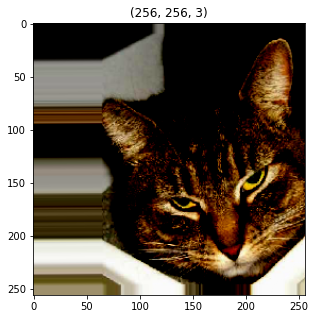

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


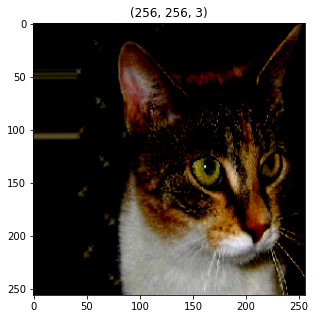

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


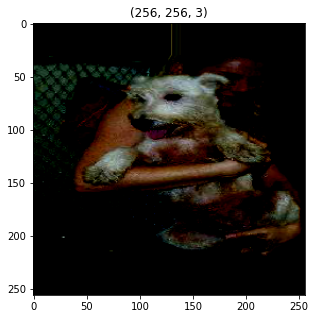

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


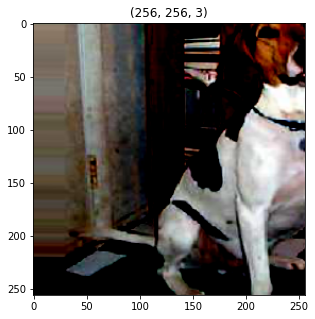

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


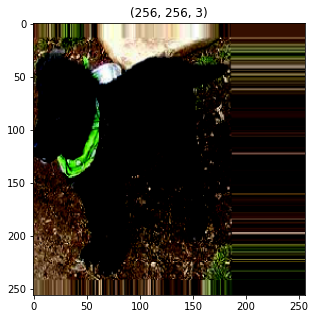

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


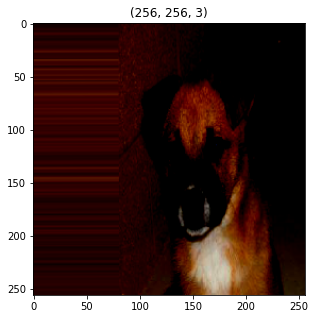

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


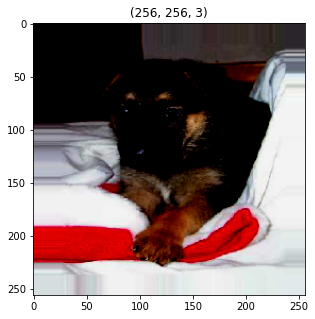

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


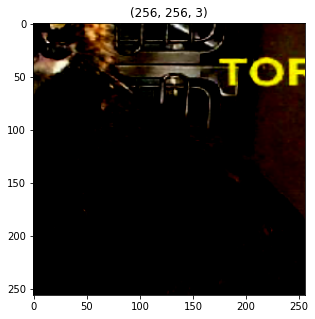

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


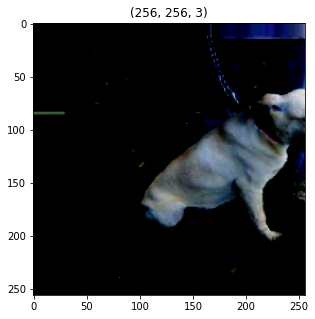

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


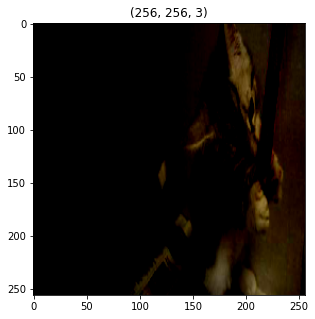

In [35]:
plotimages(t_img,label)

**Train the model**

In [36]:
from keras.callbacks import ModelCheckpoint, EarlyStopping
mc=ModelCheckpoint(filepath="./best_model.h5",
                   monitor="accuracy",
                   verbose=1,
                   save_best_only=True)
es=EarlyStopping(monitor="accuracy",
                 min_delta=0.01,
                 patience=5,
                 verbose=1)
cb=[mc,es]

In [37]:
his=model.fit_generator(train_data,
                        steps_per_epoch=10,
                        epochs=30,
                        callbacks=cb)

Epoch 1/30
10/10 [==============================] - ETA: 0s - loss: 0.4342 - accuracy: 0.8889
Epoch 1: accuracy improved from -inf to 0.88889, saving model to ./best_model.h5
10/10 [==============================] - 13s 776ms/step - loss: 0.4342 - accuracy: 0.8889
Epoch 2/30
10/10 [==============================] - ETA: 0s - loss: 0.2329 - accuracy: 0.9639
Epoch 2: accuracy improved from 0.88889 to 0.96389, saving model to ./best_model.h5
10/10 [==============================] - 8s 782ms/step - loss: 0.2329 - accuracy: 0.9639
Epoch 3/30
10/10 [==============================] - ETA: 0s - loss: 0.1654 - accuracy: 0.9750
Epoch 3: accuracy improved from 0.96389 to 0.97500, saving model to ./best_model.h5
10/10 [==============================] - 8s 780ms/step - loss: 0.1654 - accuracy: 0.9750
Epoch 4/30
10/10 [==============================] - ETA: 0s - loss: 0.2198 - accuracy: 0.9750
Epoch 4: accuracy did not improve from 0.97500
10/10 [==============================] - 7s 676ms/step - los

In [39]:
from keras.models import load_model
model=load_model("/content/best_model.h5")

In [40]:
h=his.history
h.keys()

dict_keys(['loss', 'accuracy'])

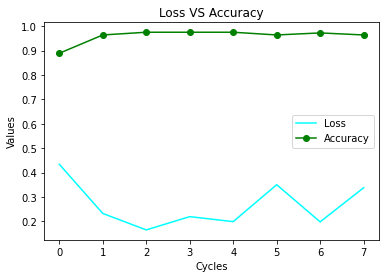

In [50]:
plt.plot(h["loss"],c='cyan')
plt.plot(h["accuracy"],c='green',marker='o')
plt.legend(["Loss","Accuracy"])
plt.title("Loss VS Accuracy")
plt.xlabel("Cycles")
plt.ylabel("Values")
plt.show()


Validate our Model

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


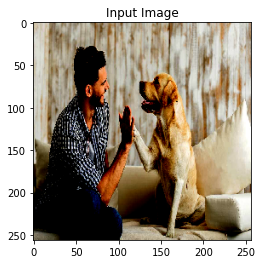

This is a DOG


In [60]:
# path for the image to see if it predics correct class

path="/content/man&dog.jpg" 
img = load_img(path, target_size=(256, 256))

i=img_to_array(img)
i= preprocess_input(i)

input_arr = np.array([i])
input_arr.shape

pred = np.argmax (model.predict (input_arr))

#display the image
plt.imshow(input_arr[0])
plt.title("Input Image")
plt.show()

if pred== 0:
  print("This is a CAT") 
else:
  print("This is a DOG")